# **Regresión lineal**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
time_studied = np.array([20,50,32,65,23]).reshape(-1,1)
scores = np. array([560,830,470,930,470]).reshape(-1,1)

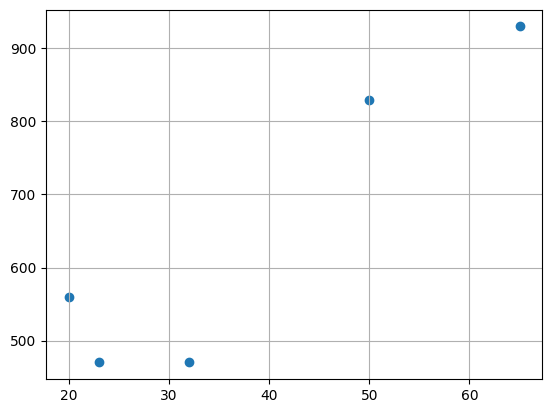

In [3]:
plt.scatter(time_studied, scores)
plt.grid()
plt.show()

[[1294.96296296]]


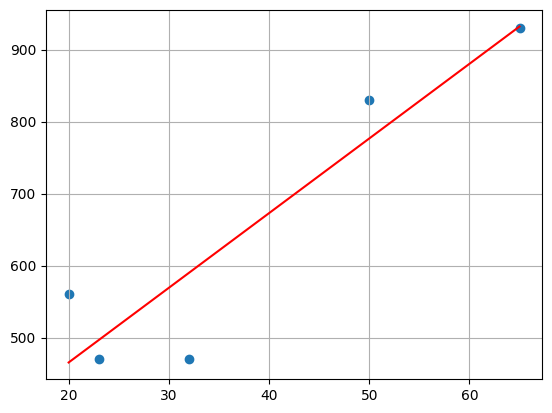

In [4]:
model = LinearRegression()
model.fit(time_studied, scores)
print(model.predict(np.array([100]).reshape(-1,1)))
plt.scatter(time_studied, scores)
plt.plot(np.linspace(20,65).reshape(-1,1),model.predict(np.linspace(20,65).reshape(-1,1)),'r')
plt.grid()
plt.show()

# **Regresión polinómica**

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X = 4 * np.random.rand(100,1) - 2
y = 4 + 2 * X + 5 * X**2 + np.random.randn(100,1)

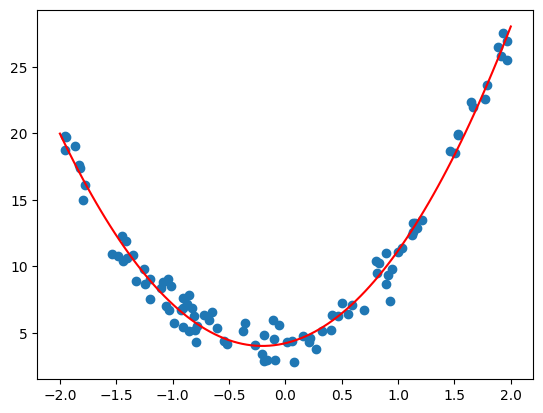

In [7]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
reg = LinearRegression()
reg.fit(X_poly,y)
X_vals = np.linspace(-2,2,100).reshape(-1,1)
X_vals_poly = poly_features.transform(X_vals)
y_vals = reg.predict(X_vals_poly)
plt.scatter(X,y)
plt.plot(X_vals, y_vals, color="r")
plt.show()

# **Ejercicio Aplicado**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
hurtos = pd.read_csv('/content/drive/MyDrive/2024-1/T&L/12. Semana/robos.csv')
hurtos

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,01/01/2017,5,ANTIOQUIA,5001,MEDELLIN,21
1,01/01/2017,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
2,01/01/2017,5,ANTIOQUIA,5045,APARTADO,1
3,01/01/2017,5,ANTIOQUIA,5088,BELLO,4
4,01/01/2017,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...,...
241104,01/01/2023,76,VALLE DEL CAUCA,76892,YUMBO,3
241105,01/01/2023,85,CASANARE,85001,YOPAL,6
241106,01/01/2023,85,CASANARE,85010,AGUAZUL,1
241107,01/01/2023,85,CASANARE,85250,PAZ DE ARIPORO,2


In [ ]:
hurtos.tail(5)

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
241104,01/01/2023,76,VALLE DEL CAUCA,76892,YUMBO,3
241105,01/01/2023,85,CASANARE,85001,YOPAL,6
241106,01/01/2023,85,CASANARE,85010,AGUAZUL,1
241107,01/01/2023,85,CASANARE,85250,PAZ DE ARIPORO,2
241108,01/01/2023,88,SAN ANDRÉS ISLAS,88001,SAN ANDRES,2


In [ ]:
hurtos['FECHA HECHO'] = pd.to_datetime(hurtos['FECHA HECHO'],
                                       format='%d/%m/%Y')

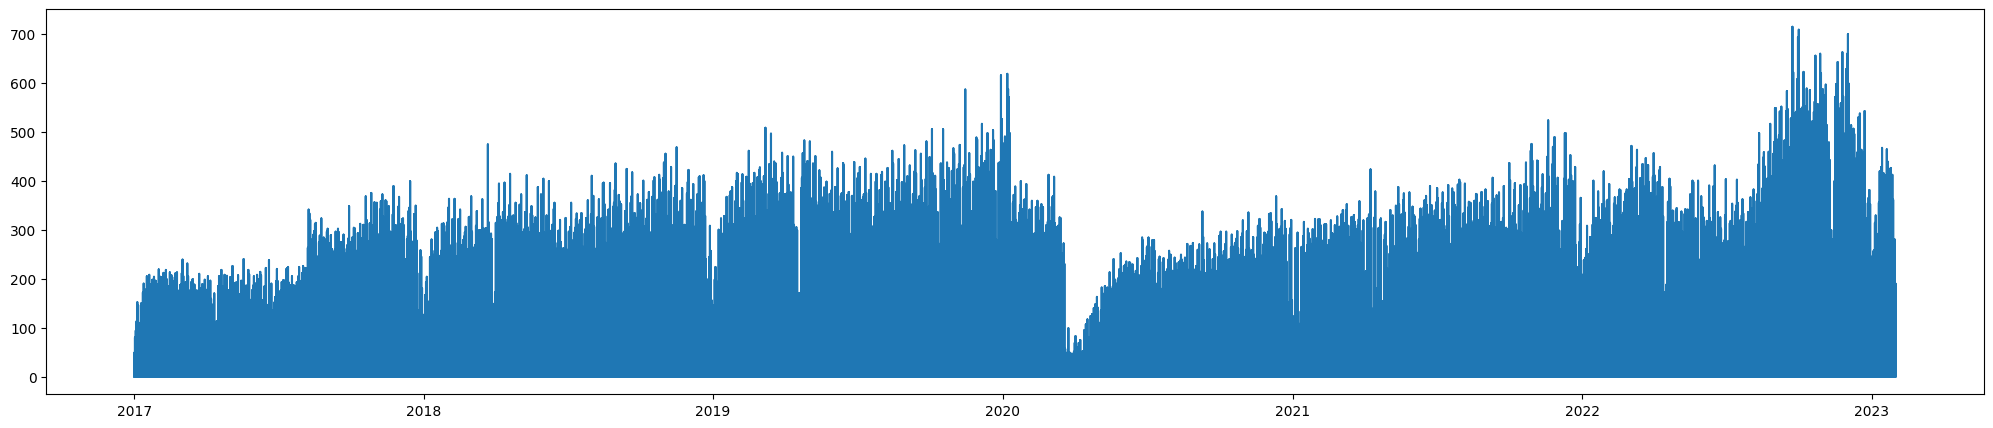

In [ ]:
plt.figure(figsize=(25, 5))
plt.plot(hurtos["FECHA HECHO"],hurtos["CANTIDAD"])

In [ ]:
hurtos_renombrados = hurtos.rename(columns={
    "FECHA HECHO": "Fecha"
})
hurtos_renombrados

,Fecha,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,2017-01-01,5,ANTIOQUIA,5001,MEDELLIN,21
1,2017-01-01,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
2,2017-01-01,5,ANTIOQUIA,5045,APARTADO,1
3,2017-01-01,5,ANTIOQUIA,5088,BELLO,4
4,2017-01-01,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...,...
241104,2023-01-01,76,VALLE DEL CAUCA,76892,YUMBO,3
241105,2023-01-01,85,CASANARE,85001,YOPAL,6
241106,2023-01-01,85,CASANARE,85010,AGUAZUL,1
241107,2023-01-01,85,CASANARE,85250,PAZ DE ARIPORO,2


In [ ]:
hurtos_2020_antioquia = hurtos_renombrados.query("Fecha >= '2020-01-01'and Fecha <= '2020-12-31'and DEPARTAMENTO == 'ANTIOQUIA'").sort_values("Fecha")
hurtos_2020_antioquia

,Fecha,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
116459,2020-01-01,5,ANTIOQUIA,5001,MEDELLIN,86
116480,2020-01-01,5,ANTIOQUIA,5837,TURBO,1
116479,2020-01-01,5,ANTIOQUIA,5790,TARAZA,1
116478,2020-01-01,5,ANTIOQUIA,5789,TAMESIS,1
116477,2020-01-01,5,ANTIOQUIA,5679,SANTA BARBARA,1
...,...,...,...,...,...,...
149725,2020-12-31,5,ANTIOQUIA,5030,AMAGA,1
149724,2020-12-31,5,ANTIOQUIA,5001,MEDELLIN,43
149738,2020-12-31,5,ANTIOQUIA,5809,TITIRIBI,1
149730,2020-12-31,5,ANTIOQUIA,5266,ENVIGADO,1


In [ ]:
# Agrupar por día y contar la cantidad de hurtos por día
hurtos_por_dia_2020 = hurtos_2020_antioquia.groupby(pd.Grouper(key='Fecha', freq='D')).size().reset_index(name='Cantidad')
hurtos_por_dia_2020

,Fecha,Cantidad
0,2020-01-01,22
1,2020-01-02,20
2,2020-01-03,23
3,2020-01-04,32
4,2020-01-05,24
...,...,...
361,2020-12-27,13
362,2020-12-28,11
363,2020-12-29,17
364,2020-12-30,13


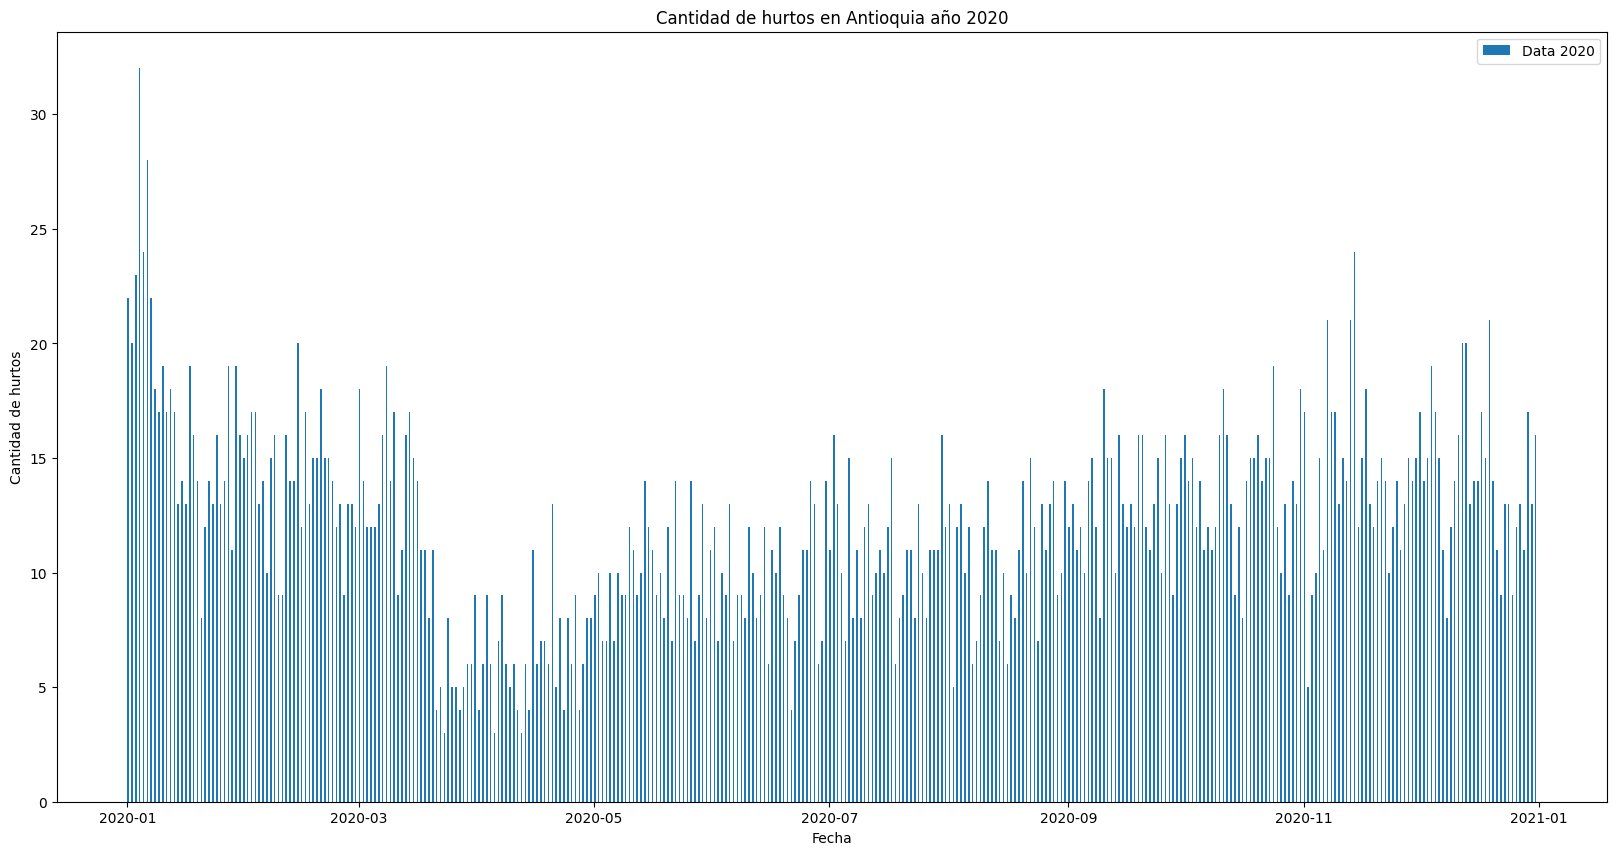

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(hurtos_por_dia_2020["Fecha"], hurtos_por_dia_2020["Cantidad"], width=0.4, align="edge", label="Data 2020")
plt.title("Cantidad de hurtos en Antioquia año 2020")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de hurtos")
plt.legend()

**IMPLEMENTACIÓN DE MODELO MACHINE**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [ ]:
hurtos_por_dia_2020

,Fecha,Cantidad
0,2020-01-01,22
1,2020-01-02,20
2,2020-01-03,23
3,2020-01-04,32
4,2020-01-05,24
...,...,...
361,2020-12-27,13
362,2020-12-28,11
363,2020-12-29,17
364,2020-12-30,13


In [ ]:
hurtos_por_dia_2020['Fecha_num'] = (hurtos_por_dia_2020['Fecha'] - hurtos_por_dia_2020['Fecha'].min()).dt.days
hurtos_por_dia_2020


,Fecha,Cantidad,Fecha_num
0,2020-01-01,22,0
1,2020-01-02,20,1
2,2020-01-03,23,2
3,2020-01-04,32,3
4,2020-01-05,24,4
...,...,...,...
361,2020-12-27,13,361
362,2020-12-28,11,362
363,2020-12-29,17,363
364,2020-12-30,13,364


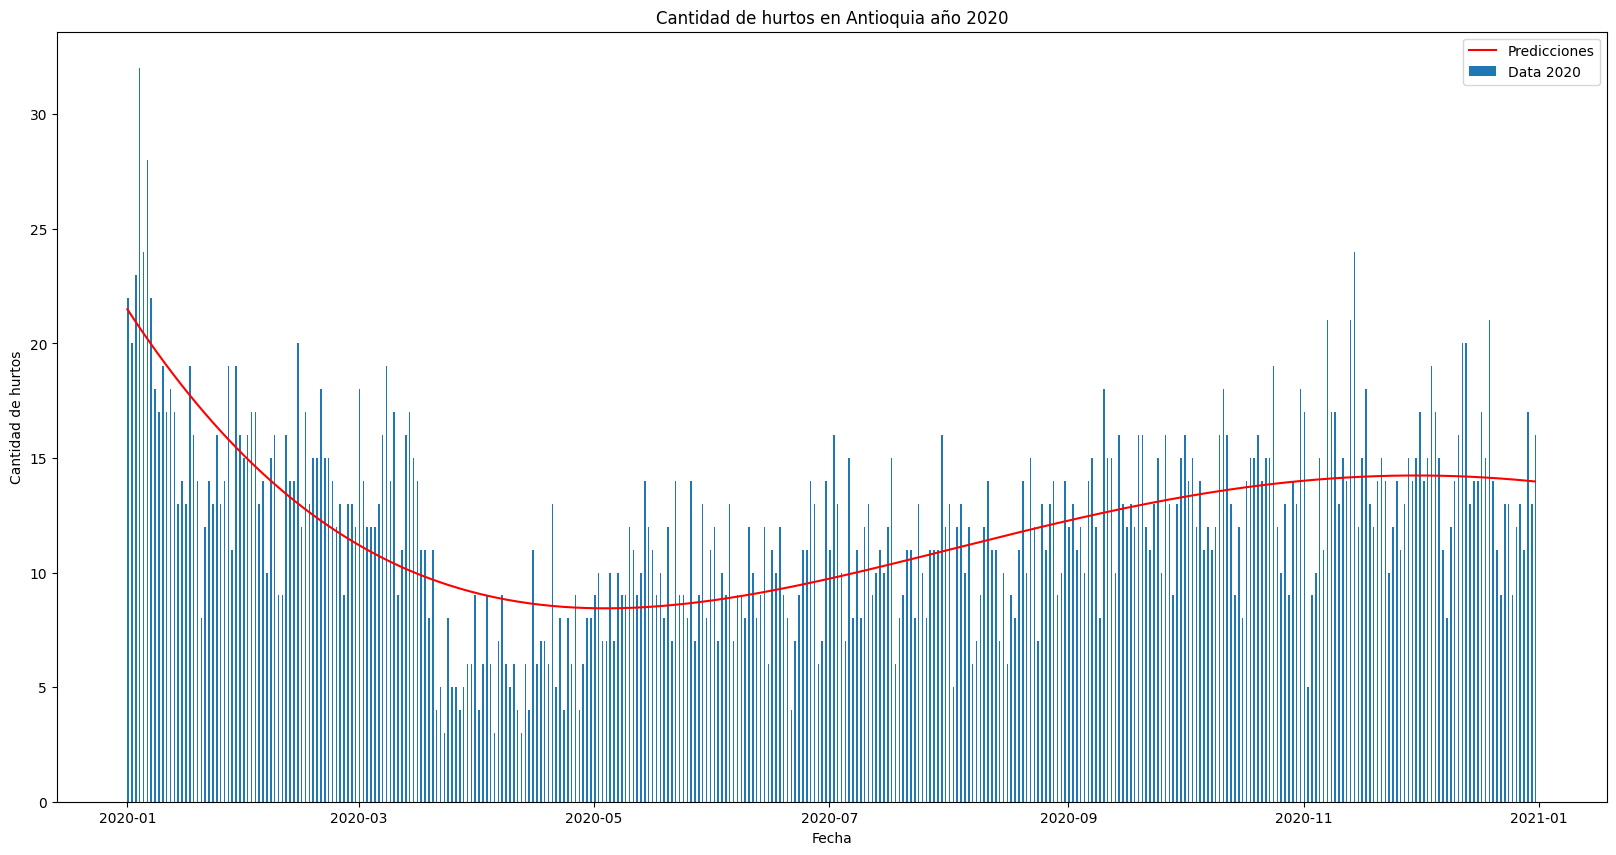

In [ ]:
X = hurtos_por_dia_2020[['Fecha_num']]  # Característica
y = hurtos_por_dia_2020['Cantidad']  # Variable objetivo
# Crear un modelo de regresión polinómica
model = make_pipeline(PolynomialFeatures(4), LinearRegression())
# Entrenar el modelo de regresión polinómica
model.fit(X, y)
# Evaluación del modelo
y_pred_2020 = model.predict(X)
# gráfica
plt.figure(figsize=(20,10))
plt.bar(hurtos_por_dia_2020["Fecha"], hurtos_por_dia_2020["Cantidad"], width=0.4, align="edge", label="Data 2020")
plt.plot(hurtos_por_dia_2020["Fecha"], y_pred_2020, color='red', label='Predicciones')
plt.title("Cantidad de hurtos en Antioquia año 2020")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de hurtos")
plt.legend()


In [ ]:
hurtos_2021_antioquia = hurtos_renombrados.query("Fecha >= '2021-01-01'and Fecha <= '2021-12-31'and DEPARTAMENTO == 'ANTIOQUIA'").sort_values("Fecha")
hurtos_2021_antioquia

,Fecha,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
149838,2021-01-01,5,ANTIOQUIA,5001,MEDELLIN,13
149851,2021-01-01,5,ANTIOQUIA,5615,RIONEGRO,1
149850,2021-01-01,5,ANTIOQUIA,5440,MARINILLA,1
149849,2021-01-01,5,ANTIOQUIA,5376,LA CEJA,2
149848,2021-01-01,5,ANTIOQUIA,5360,ITAGUI,1
...,...,...,...,...,...,...
191241,2021-12-31,5,ANTIOQUIA,5079,BARBOSA,1
191240,2021-12-31,5,ANTIOQUIA,5045,APARTADO,1
191239,2021-12-31,5,ANTIOQUIA,5001,MEDELLIN,50
191244,2021-12-31,5,ANTIOQUIA,5154,CAUCASIA,3


In [ ]:
# Agrupar por día y contar la cantidad de hurtos por día para ambos años
hurtos_por_dia_2021 = hurtos_2021_antioquia.groupby(pd.Grouper(key='Fecha', freq='D')).size().reset_index(name='Cantidad')
hurtos_por_dia_2021['Fecha_num'] = (hurtos_por_dia_2021['Fecha'] - hurtos_por_dia_2021['Fecha'].min()).dt.days
hurtos_por_dia_2021

,Fecha,Cantidad,Fecha_num
0,2021-01-01,14,0
1,2021-01-02,10,1
2,2021-01-03,13,2
3,2021-01-04,15,3
4,2021-01-05,13,4
...,...,...,...
360,2021-12-27,20,360
361,2021-12-28,13,361
362,2021-12-29,14,362
363,2021-12-30,15,363


In [ ]:
hurtos_por_dia_combined = pd.concat([hurtos_por_dia_2020, hurtos_por_dia_2021])
hurtos_por_dia_combined

,Fecha,Cantidad,Fecha_num
0,2020-01-01,22,0
1,2020-01-02,20,1
2,2020-01-03,23,2
3,2020-01-04,32,3
4,2020-01-05,24,4
...,...,...,...
360,2021-12-27,20,360
361,2021-12-28,13,361
362,2021-12-29,14,362
363,2021-12-30,15,363


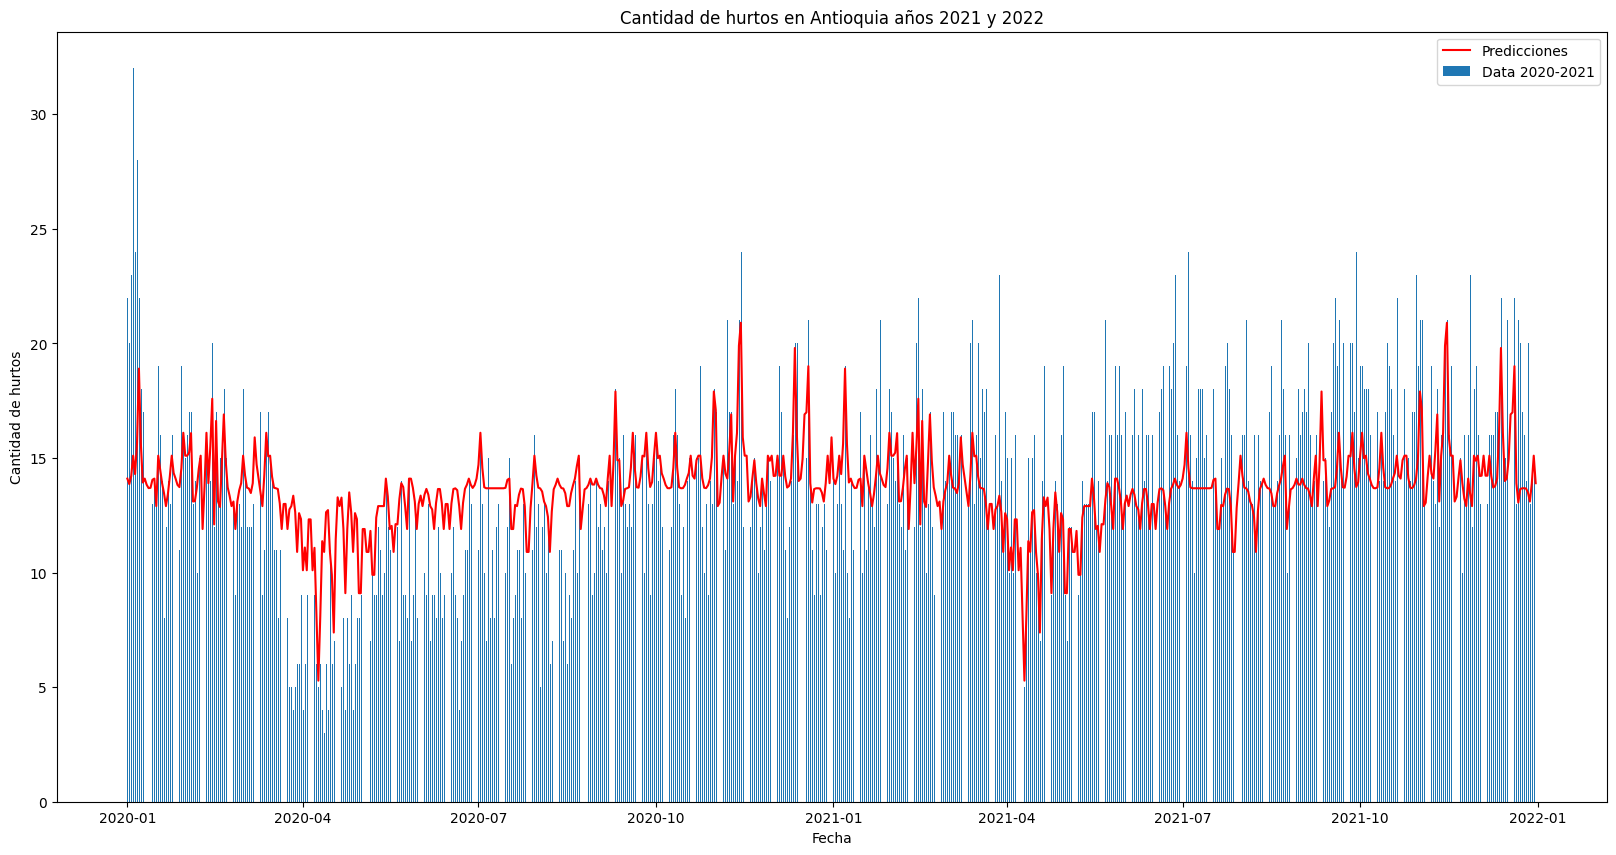

In [ ]:
# Separar los datos combinados en características (X) y variable objetivo (y)
X_combined = hurtos_por_dia_combined[['Fecha_num']]
y_combined = hurtos_por_dia_combined['Cantidad']

# Crear un modelo de regresión no lineal SVR
model_combined = SVR(kernel='rbf', C=3, gamma='auto', epsilon=0.1)  # kernel rbf (radial basis function)
model_combined.fit(X_combined, y_combined)
y_pred_combined = model_combined.predict(X_combined)

# Visualizar los datos y las predicciones para ambos años
plt.figure(figsize=(20,10))
plt.bar(hurtos_por_dia_combined["Fecha"], hurtos_por_dia_combined["Cantidad"], width=0.4, align="edge", label="Data 2020-2021")
plt.plot(hurtos_por_dia_combined["Fecha"], y_pred_combined, color='red', label='Predicciones')
plt.title("Cantidad de hurtos en Antioquia años 2021 y 2022")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de hurtos")
plt.legend()
plt.show()

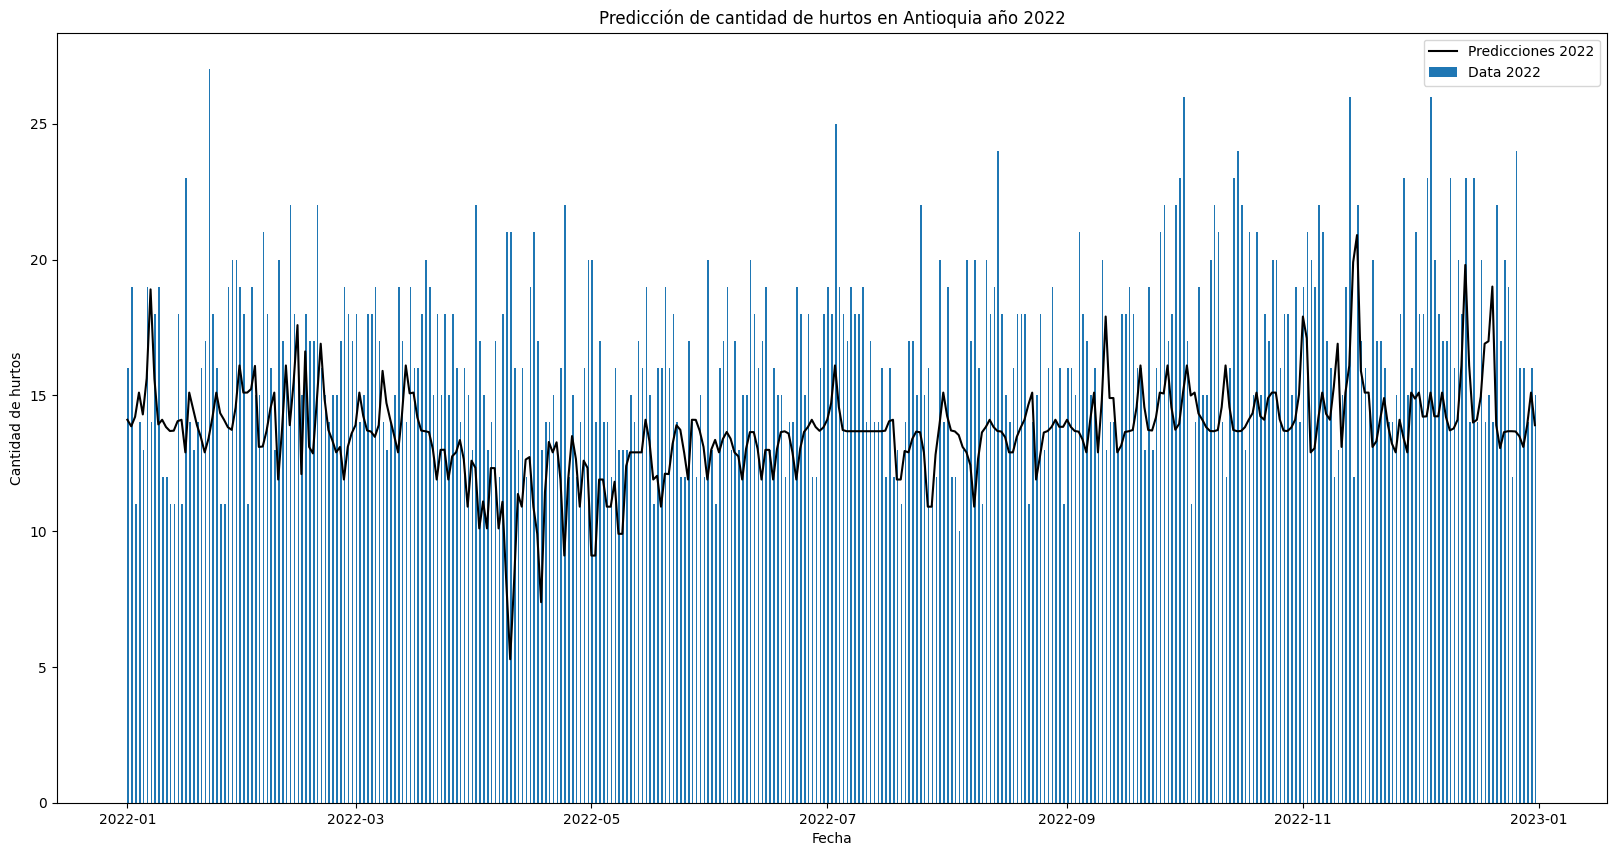

In [ ]:
hurtos_2022_antioquia = hurtos_renombrados.query("Fecha >= '2022-01-01'and Fecha <= '2022-12-31'and DEPARTAMENTO == 'ANTIOQUIA'").sort_values("Fecha")
hurtos_por_dia_2022 = hurtos_2022_antioquia.groupby(pd.Grouper(key='Fecha', freq='D')).size().reset_index(name='Cantidad')
hurtos_por_dia_2022['Fecha_num'] = (hurtos_por_dia_2022['Fecha'] - hurtos_por_dia_2022['Fecha'].min()).dt.days
X_2022 = hurtos_por_dia_2022[['Fecha_num']]
# Hacer predicciones para el año 2023
y_pred_2022 = model_combined.predict(X_2022)
# Visualizar los datos y las predicciones para el año 2022
plt.figure(figsize=(20,10))
plt.bar(hurtos_por_dia_2022["Fecha"], hurtos_por_dia_2022["Cantidad"], width=0.4, align="edge", label="Data 2022")
plt.plot(hurtos_por_dia_2022["Fecha"], y_pred_2022, color='black', label='Predicciones 2022')
plt.title("Predicción de cantidad de hurtos en Antioquia año 2022")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de hurtos")
plt.legend()
plt.show()